**Portfolio Simulation using Time Series Modeling**  
Arun Chand  
MBA | Utica University

In [ ]:
import yfinance as yf
import pandas as pd

**Downloading the Stock Data from Yahoo Finance**

In [ ]:
# stock symbols for Apple, Nvidia, Vistra and MicroStrategy
# stocks = ["AAPL", "NVDA", "VST", "MSTR"]

#setting date to get last 5 year data
start_date = '2020-01-01'
end_date = '2025-01-01'

#downloading the data
nvda_data = yf.download('NVDA', start=start_date, end=end_date)
vst_data = yf.download('VST', start=start_date, end=end_date)
aapl_data = yf.download('AAPL', start=start_date, end=end_date)
mstr_data = yf.download('MSTR', start=start_date, end=end_date)

nvda_data.head(5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
2020-01-03,5.877112,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
2020-01-07,5.973209,6.019017,5.885078,5.930139,314856000
2020-01-08,5.984412,6.025739,5.928895,5.968977,277108000


**Data Pre-processing**

In [ ]:
# Check for missing data in each stock
print(nvda_data.isnull().sum())
print(vst_data.isnull().sum())
print(aapl_data.isnull().sum())
print(mstr_data.isnull().sum())

Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64
Price   Ticker
Close   VST       0
High    VST       0
Low     VST       0
Open    VST       0
Volume  VST       0
dtype: int64
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64
Price   Ticker
Close   MSTR      0
High    MSTR      0
Low     MSTR      0
Open    MSTR      0
Volume  MSTR      0
dtype: int64


In [ ]:
# Forward fill (carry forward the last valid observation)
nvda_data.ffill(inplace=True)
vst_data.ffill(inplace=True)
aapl_data.ffill(inplace=True)
mstr_data.ffill(inplace=True)

# Can drop missing values (but less common in stock data)
# nvda_data.dropna(inplace=True)

**Feature Engineering**  
1. SMA - Simple Moving Average
2. EMA - Esseintial Moving Average
3. RSI - Relative Strength Index


In [ ]:
#Function to add techincal indicatiors to data
def add_technical_indicators(data):
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

    # Calculate RSI
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    return data

#adding features to data
nvda_data = add_technical_indicators(nvda_data)
vst_data = add_technical_indicators(vst_data)
aapl_data = add_technical_indicators(aapl_data)
mstr_data = add_technical_indicators(mstr_data)

In [ ]:
#drop the first 49 records as they will have missing (NaN) values
#since we are using moving averages using 50 days.
def drop_49(data):
    data = data.iloc[49:]
    return data

nvda_data = drop_49(nvda_data)
vst_data = drop_49(vst_data)
aapl_data = drop_49(aapl_data)
mstr_data = drop_49(mstr_data)

In [ ]:
nvda_data.head(5)

Price,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,,
Date,,,,,,,,,
2020-03-13,5.999451,6.003934,5.470600,5.741876,634836000,6.731322,6.406614,6.452557,42.267585
2020-03-16,4.892426,5.632269,4.832641,5.291243,726972000,6.615219,6.385008,6.303973,36.464215
2020-03-17,5.412309,5.501738,4.757910,5.004773,833632000,6.516669,6.375712,6.219052,40.237173
2020-03-18,5.052352,5.229715,4.500833,4.984595,874268000,6.377554,6.358724,6.107938,40.306129
2020-03-19,5.305194,5.398857,4.817446,5.030929,765512000,6.258550,6.345363,6.031486,38.554365


In [ ]:
nvda_data.tail(5)

Price,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,,
Date,,,,,,,,,
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000,137.166625,139.754000,137.041106,43.182440
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600,137.317596,139.920781,137.316238,42.920221
2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600,137.401563,139.946768,137.287072,42.567738
2024-12-30,137.490005,140.270004,134.020004,134.830002,167734700,137.364039,139.958157,137.306399,48.022779
2024-12-31,134.289993,138.070007,133.830002,138.029999,155659200,137.147516,139.884147,137.019122,48.812403


**Normalizing Data**  
It's important to normalize the features, especially if you're using models like neural networks or models sensitive to scaling (e.g., SVM). We'll use the MinMaxScaler to scale prices and technical indicators.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Dictionary to hold scalers for inverse transformation later
scalers = {}

# Function to normalize data and store scalers
def normalize_data(data, columns_to_scale):

    # Loop through each column and apply MinMaxScaler individually
    for column in columns_to_scale:
        scaler = MinMaxScaler()
        data[[column]] = scaler.fit_transform(data[[column]])

        # Store the scaler for future inverse transformation
        scalers[column] = scaler

    return data

# Name of columns that we need to transform
columns_to_scale = ['Close', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI']

# Normalize data for all stocks
nvda_data = normalize_data(nvda_data, columns_to_scale)
vst_data = normalize_data(vst_data, columns_to_scale)
aapl_data = normalize_data(aapl_data, columns_to_scale)
mstr_data = normalize_data(mstr_data, columns_to_scale)

# Function to reverse scaling after prediction (use with LSTM and RF model predictions)
def inverse_transform_predictions(predicted_values, column_name):

    # Use the appropriate scaler to inverse transform the predictions
    scaler = scalers[column_name]  # Fetch the correct scaler for the column
    original_values = scaler.inverse_transform(predicted_values.reshape(-1, 1))  # Reshape if needed

    return original_values

# Updated inverse_transform_predictions function for y_test
def inverse_transform_with_index(y_test, column_name):
    # Extract the 'Date' index before converting to NumPy array
    dates = y_test.index.get_level_values('Date')  # Extract 'Date' level

    # Get the values and apply inverse transformation
    y_test_values = y_test.values  # Convert to NumPy array
    y_test_inv = inverse_transform_predictions(y_test_values, column_name)  # Apply inverse scaling

    # Re-create a DataFrame or Series with the original 'Date' index
    y_test_inv_df = pd.DataFrame(y_test_inv, index=dates, columns=[column_name])

    return y_test_inv_df

<ipython-input-92-2f0b1852ab89>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[[column]] = scaler.fit_transform(data[[column]])


**Test, Train Split**


In [ ]:
from sklearn.model_selection import train_test_split

def split_train_test(data, feature_columns, target_column, test_size=0.2):
    X = data[feature_columns]
    y = data[target_column]

    # Split into training and testing sets (80% training set, 20% test set)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    return X_train, X_test, y_train, y_test

feature_columns = ['SMA_20', 'SMA_50', 'EMA_20', 'RSI'] #predictors
target_column = 'Close' #prediction

#splitting data into training and test sets
X_train_nvda, X_test_nvda, y_train_nvda, y_test_nvda = split_train_test(nvda_data, feature_columns, target_column)
X_train_vst, X_test_vst, y_train_vst, y_test_vst = split_train_test(vst_data, feature_columns, target_column)
X_train_aapl, X_test_aapl, y_train_aapl, y_test_aapl = split_train_test(aapl_data, feature_columns, target_column)
X_train_mstr, X_test_mstr, y_train_mstr, y_test_mstr = split_train_test(mstr_data, feature_columns, target_column)

In [ ]:
# print(len(X_test_nvda))
# y_test_nvda

In [ ]:
X_test_nvda.head(5)

Price,SMA_20,SMA_50,EMA_20,RSI
Ticker,,,,
Date,,,,
2024-01-17,0.327775,0.319034,0.334243,0.800684
2024-01-18,0.330335,0.320845,0.338055,0.817800
2024-01-19,0.333936,0.322901,0.343164,0.851164
2024-01-22,0.338141,0.324951,0.347900,0.853159
2024-01-23,0.342104,0.326941,0.352337,0.948886


**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#random forest model build and train
def rf_model(X_train, y_train):
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate the model using MSE and R-squared
def evaluate_model(model, X_test, y_test):
    # Predict using the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R²)
    r2 = r2_score(y_test, y_pred)

    return mse, r2


#passes trained rf model and x-test values to make the predictions (y_pred) and y_test to compare preds vs actual values
rf_nvda = rf_model(X_train_nvda, y_train_nvda)
mse_rf_nvda, r2_rf_nvda = evaluate_model(rf_nvda, X_test_nvda, y_test_nvda)
print(f"NVDA Random Forest Model - MSE: {mse_rf_nvda}, R²: {r2_rf_nvda}")

rf_vst = rf_model(X_train_vst, y_train_vst)
mse_rf_vst, r2_rf_vst = evaluate_model(rf_vst, X_test_vst, y_test_vst)
print(f"VST Random Forest Model - MSE: {mse_rf_vst}, R²: {r2_rf_vst}")

rf_aapl = rf_model(X_train_aapl, y_train_aapl)
mse_rf_aapl, r2_rf_aapl = evaluate_model(rf_aapl, X_test_aapl, y_test_aapl)
print(f"AAPL Random Forest Model - MSE: {mse_rf_aapl}, R²: {r2_rf_aapl}")

rf_mstr = rf_model(X_train_mstr, y_train_mstr)
mse_rf_mstr, r2_rf_mstr = evaluate_model(rf_mstr, X_test_mstr, y_test_mstr)
print(f"MSTR Random Forest Model - MSE: {mse_rf_mstr}, R²: {r2_rf_mstr}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


NVDA Random Forest Model - MSE: 0.177213557047085, R²: -4.937730905874801


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


VST Random Forest Model - MSE: 0.16119821782037827, R²: -2.538873779513908


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


AAPL Random Forest Model - MSE: 0.02076601492979856, R²: -0.31065632418251776


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSTR Random Forest Model - MSE: 0.0845985221438999, R²: -1.1311138645544765


**LSTM Neural Netwrok**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Function to preprocess data for LSTM
def prepare_lstm_data(X, y, time_steps=20):
    X_lstm, y_lstm = [], []
    for i in range(len(X) - time_steps):
        X_lstm.append(X[i:i + time_steps])
        y_lstm.append(y[i + time_steps])
    return np.array(X_lstm), np.array(y_lstm)

time_steps = 20  # We'll use 20-day windows for predictions

#PREPARE DATA FOR Nerual Network Model
X_train_lstm_nvda, y_train_lstm_nvda = prepare_lstm_data(X_train_nvda.values, y_train_nvda.values, time_steps)
X_test_lstm_nvda, y_test_lstm_nvda = prepare_lstm_data(X_test_nvda.values, y_test_nvda.values, time_steps)

X_train_lstm_vst, y_train_lstm_vst = prepare_lstm_data(X_train_vst.values, y_train_vst.values, time_steps)
X_test_lstm_vst, y_test_lstm_vst = prepare_lstm_data(X_test_vst.values, y_test_vst.values, time_steps)

X_train_lstm_aapl, y_train_lstm_aapl = prepare_lstm_data(X_train_aapl.values, y_train_aapl.values, time_steps)
X_test_lstm_aapl, y_test_lstm_aapl = prepare_lstm_data(X_test_aapl.values, y_test_aapl.values, time_steps)

X_train_lstm_mstr, y_train_lstm_mstr = prepare_lstm_data(X_train_mstr.values, y_train_mstr.values, time_steps)
X_test_lstm_mstr, y_test_lstm_mstr = prepare_lstm_data(X_test_mstr.values, y_test_mstr.values, time_steps)


# Build the LSTM model
def build_and_train_lstm_model(X_train, y_train, epochs=10, batch_size=32):

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return model

#Build and train LSTM model for all Stock Dataset
lstm_model_nvda = build_and_train_lstm_model(X_train_lstm_nvda, y_train_lstm_nvda)
lstm_model_vst = build_and_train_lstm_model(X_train_lstm_vst, y_train_lstm_vst)
lstm_model_aapl = build_and_train_lstm_model(X_train_lstm_aapl, y_train_lstm_aapl)
lstm_model_mstr = build_and_train_lstm_model(X_train_lstm_mstr, y_train_lstm_mstr)


# Make predictions with the LSTM model and Evaluation using MSE
y_pred_lstm_nvda = lstm_model_nvda.predict(X_test_lstm_nvda)
print(f"NVDA LSTM Model - MSE: {mean_squared_error(y_test_lstm_nvda, y_pred_lstm_nvda)}")

y_pred_lstm_vst = lstm_model_vst.predict(X_test_lstm_vst)
print(f"VST LSTM Model - MSE: {mean_squared_error(y_test_lstm_vst, y_pred_lstm_vst)}")

y_pred_lstm_aapl = lstm_model_aapl.predict(X_test_lstm_aapl)
print(f"AAPL LSTM Model - MSE: {mean_squared_error(y_test_lstm_aapl, y_pred_lstm_aapl)}")

y_pred_lstm_mstr = lstm_model_mstr.predict(X_test_lstm_mstr)
print(f"MSTR LSTM Model - MSE: {mean_squared_error(y_test_lstm_mstr, y_pred_lstm_mstr)}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0128
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.7372e-04
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.6247e-04
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.5430e-04
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.6679e-04
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.5711e-04
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.4012e-04
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.2993e-04
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.2462e-04
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.3699e-04
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0018
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.8255e-05
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.1973e-05
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.9920e-05
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
print(len(y_pred_lstm_nvda))

222


**Ensambl Learning**
- Stacking the RF and LSTM Model


In [ ]:
#Function to combine predictions from both Random Forest and LSTM
def combine_predictions(rf_model, lstm_model, X_test_rf, X_test_lstm):
    # Predict with Random Forest
    rf_pred = rf_model.predict(X_test_rf[20:])

    # Predict with LSTM
    lstm_pred = lstm_model.predict(X_test_lstm).flatten()  # Flatten LSTM output

    # Combine predictions by averaging
    min_length = min(len(rf_pred), len(lstm_pred))

    # Trim the predictions to the same length
    rf_pred_trimmed = rf_pred[:min_length]

    # Combine the trimmed predictions by averaging
    combined_pred = (rf_pred_trimmed + lstm_pred) / 2.0

    return combined_pred


# Combine predictions for NVIDIA stock
# pass the two different models, X_test for rf to make predictions and X_test_lstm_nvda for LSTM model to make predictions
# inverse transform predictions to original values

combined_pred_nvda = combine_predictions(rf_nvda, lstm_model_nvda, X_test_nvda, X_test_lstm_nvda)
combined_pred_vst = combine_predictions(rf_vst, lstm_model_vst, X_test_vst, X_test_lstm_vst)
combined_pred_aapl = combine_predictions(rf_aapl, lstm_model_aapl, X_test_aapl, X_test_lstm_aapl)
combined_pred_mstr = combine_predictions(rf_mstr, lstm_model_mstr, X_test_mstr, X_test_lstm_mstr)

# Evaluation of the combined model for each stock
mse_combined_nvda = mean_squared_error(y_test_nvda[20:], combined_pred_nvda)
r2_combined_nvda = r2_score(y_test_nvda[20:], combined_pred_nvda)
print(f"Combined Model (Random Forest + LSTM) - MSE: {mse_combined_nvda}, R²: {r2_combined_nvda}")

mse_combined_vst = mean_squared_error(y_test_vst[20:], combined_pred_vst)
r2_combined_vst = r2_score(y_test_vst[20:], combined_pred_vst)
print(f"Combined Model (Random Forest + LSTM) - MSE: {mse_combined_vst}, R²: {r2_combined_vst}")

mse_combined_aapl = mean_squared_error(y_test_aapl[20:], combined_pred_aapl)
r2_combined_aapl = r2_score(y_test_aapl[20:], combined_pred_aapl)
print(f"Combined Model (Random Forest + LSTM) - MSE: {mse_combined_aapl}, R²: {r2_combined_aapl}")

mse_combined_mstr = mean_squared_error(y_test_mstr[20:], combined_pred_mstr)
r2_combined_mstr = r2_score(y_test_mstr[20:], combined_pred_mstr)
print(f"Combined Model (Random Forest + LSTM) - MSE: {mse_combined_mstr}, R²: {r2_combined_mstr}")

## [20:] we are using this to drop first 20 records and align the test dataset for both models
## the LSTM model has removed first 20 records because of the lookback period (time_steps) i.e. predefined by us as 20
## this is done beacuse in time series prediction LTSM looks at "20" past data points to make prediction
## we have to readjust the number of rows to align the test datasets based on the lookback period

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Combined Model (Random Forest + LSTM) - MSE: 0.07153556092976873, R²: -2.1842883230054553
Combined Model (Random Forest + LSTM) - MSE: 0.05117881140066418, R²: -0.2996981422995513
Combined Model (Random Forest + LSTM) - MSE: 0.00902390637081882, R²: 0.448701221055264
Combined Model (Random Forest + LSTM) - MSE: 0.05060184669995244, R²: -0.39205019224768334


**Visualization of Predictions Vs Actual**

In [ ]:
y_test_nvda[20:]

Ticker,NVDA
Date,
2024-02-14,0.479149
2024-02-15,0.470525
2024-02-16,0.470213
2024-02-20,0.448264
2024-02-21,0.434516
...,...
2024-12-24,0.939923
2024-12-26,0.937909
2024-12-27,0.917628


In [ ]:
### to extract dates from multi indexed column
# dates = y_test_nvda.index.get_level_values('Date')[20:]  # Extract 'Date' level
# len(dates)
###

In [ ]:
import matplotlib.pyplot as plt

def plot_stock_predictions(y_test, y_pred, stock_name):

    # Extract the 'Date' index from the MultiIndex in y_test
    dates = y_test.index.get_level_values('Date')  # Extract 'Date' level

    # Ensure the 'Date' is in datetime format
    dates = pd.to_datetime(dates)

    # Plot the actual vs predicted values with the correct x-axis (dates)
    plt.figure(figsize=(10, 6))

    # Plot actual values with corresponding dates
    plt.plot(dates, y_test, label=f'Actual {stock_name} Stock Price', color='blue')

    # Plot predicted values with corresponding dates
    plt.plot(dates, y_pred, label=f'Predicted {stock_name} Stock Price', color='orange', linestyle='--')

    # Set plot title and labels
    plt.title(f'Actual vs Predicted Stock Prices for {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')

    # Format x-axis for better date visibility
    plt.xticks(rotation=45)

    # Show legend
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


In [ ]:
#Inverse Scaling 'Predicted Prices' for each stock
pred_nvda_org = inverse_transform_predictions(combined_pred_nvda, 'Close')
pred_vst_org = inverse_transform_predictions(combined_pred_vst, 'Close')
pred_aapl_org = inverse_transform_predictions(combined_pred_aapl, 'Close')
pred_mstr_org = inverse_transform_predictions(combined_pred_mstr, 'Close')

In [ ]:
# pred_nvda_org

In [ ]:
#Inverse Scaling 'Actual Prices' for each stock to original values
y_test_nvda_org = inverse_transform_with_index(y_test_nvda[20:], 'Close')
y_test_vst_org = inverse_transform_with_index(y_test_vst[20:], 'Close')
y_test_aapl_org = inverse_transform_with_index(y_test_aapl[20:], 'Close')
y_test_mstr_org = inverse_transform_with_index(y_test_mstr[20:], 'Close')

In [ ]:
# y_test_nvda_org

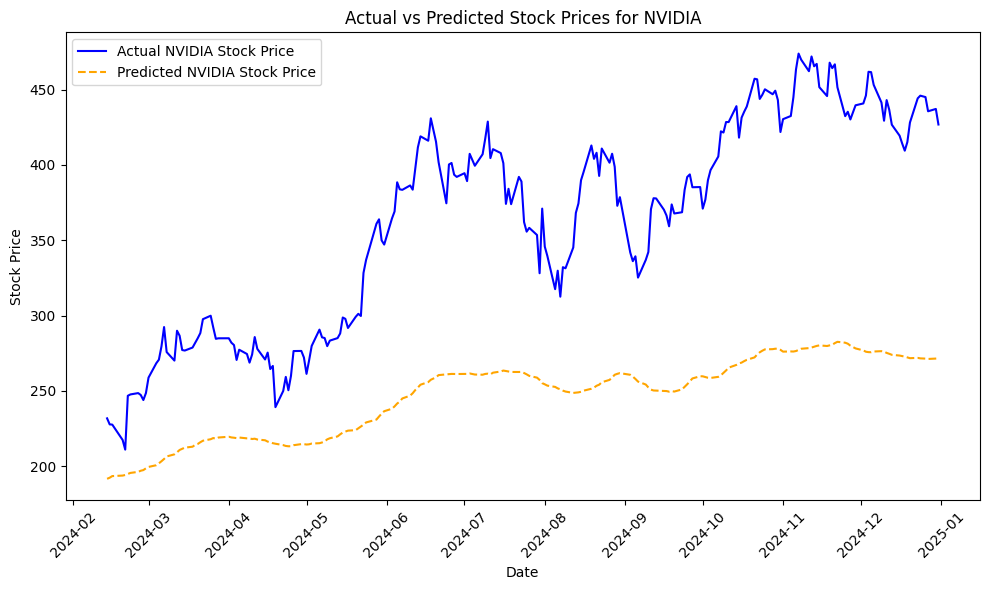

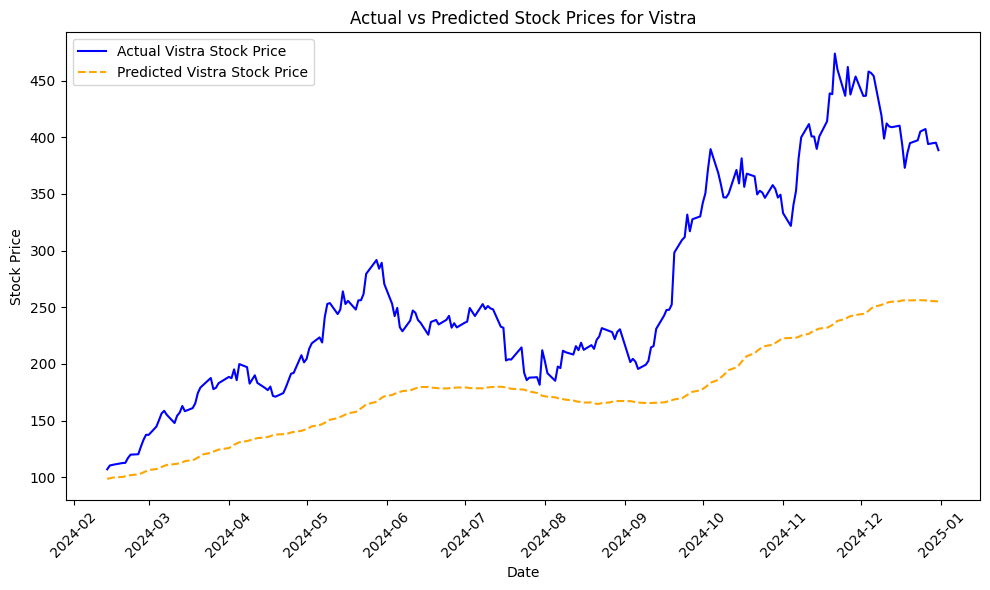

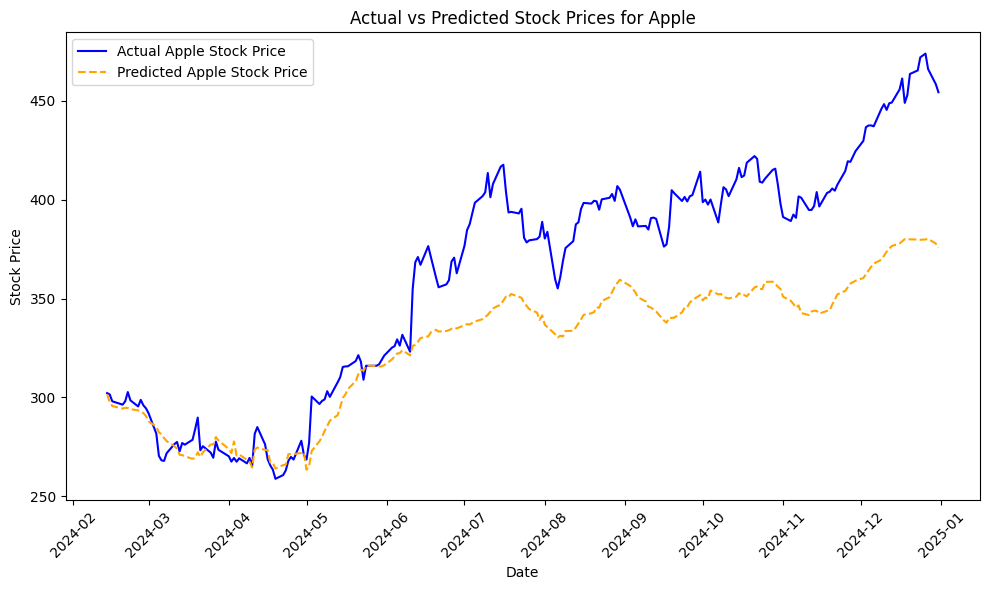

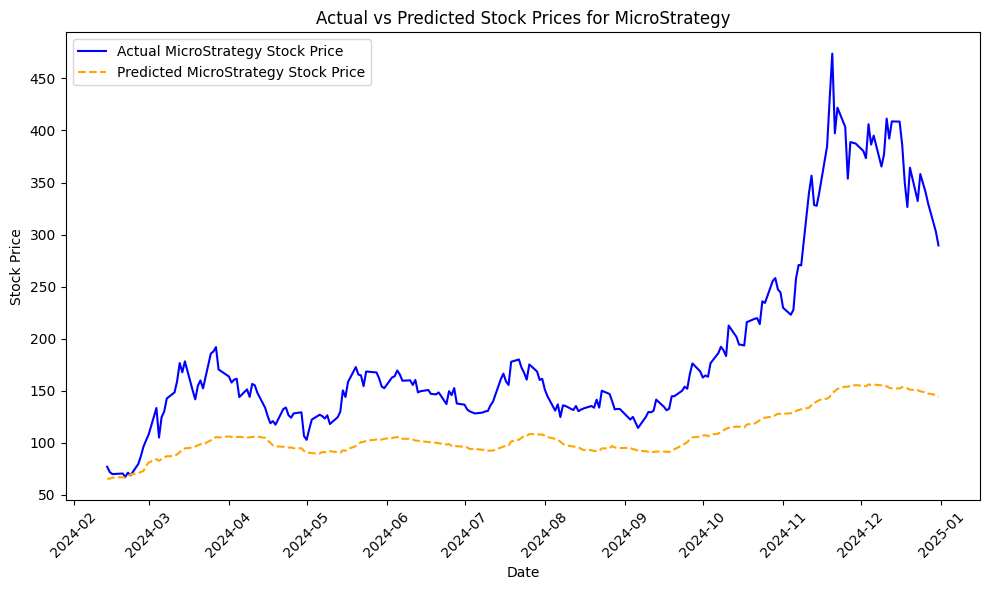

In [ ]:
# Plot the predictions for each stock
plot_stock_predictions(y_test_nvda_org, pred_nvda_org, 'NVIDIA')
plot_stock_predictions(y_test_vst_org, pred_vst_org, 'Vistra')
plot_stock_predictions(y_test_aapl_org, pred_aapl_org, 'Apple')
plot_stock_predictions(y_test_mstr_org, pred_mstr_org, 'MicroStrategy')

**Portfolio Management Simulation**

In [ ]:
# Dictionary of predicted and actual prices for each stock
predicted_prices = {
    'NVDA': pred_nvda_org,
    'VST': pred_vst_org,
    'AAPL': pred_aapl_org,
    'MSTR': pred_mstr_org
}

# Dictionary of actual prices for each stock
actual_prices = {
    'NVDA': y_test_nvda_org,  # Ensure correct alignment with predictions
    'VST': y_test_vst_org,
    'AAPL': y_test_aapl_org,
    'MSTR': y_test_mstr_org
}

initial_investment = 100000  # Replace with your desired initial investment

In [ ]:
# #extracting prices from multiindexed df that has 'ticker,dates and nvda'
# nvda_prices = y_test_nvda['NVDA'].values
# nvda_prices
# len(y_test_nvda[20:]['NVDA'].values)

In [ ]:
# actual_prices['NVDA'].values.flatten()

In [ ]:
# Initialize portfolio
initial_investment = 10000
stocks = ['NVDA', 'VST', 'AAPL', 'MSTR']

# Create dictionaries to store portfolio values
portfolio_predicted = {}
portfolio_actual = {}

# Split initial investment equally among stocks
investment_per_stock = initial_investment / len(stocks)

# Portfolio Simulation
for stock in stocks:

    # Retrive Predicted and actual prices from the dictionaries
    predicted_prices_stock = predicted_prices[stock]
    actual_prices_stock = actual_prices[stock].values.flatten() # Convert actual prices to np.array for consistency

    # Calculate number of shares bought initially (based on actual price)
    initial_price = actual_prices_stock[0]
    shares_bought = investment_per_stock / initial_price

    # Calculate portfolio value over time based on predicted prices
    portfolio_predicted[stock] = (predicted_prices_stock * shares_bought).flatten()

    # Calculate portfolio value over time based on actual prices
    portfolio_actual[stock] = actual_prices_stock * shares_bought

# Use a common index for all stocks (e.g., NVIDIA's index, assuming all stocks have the same date range)
common_index = actual_prices['NVDA'].index  # Modify this to another stock if needed

# Create DataFrames to store portfolio values over time using the common index
portfolio_predicted_df = pd.DataFrame(portfolio_predicted, index=common_index)
portfolio_actual_df = pd.DataFrame(portfolio_actual, index=common_index)

# Sum up total portfolio values over time
total_portfolio_predicted = portfolio_predicted_df.sum(axis=1)  # Sum across all stocks
total_portfolio_actual = portfolio_actual_df.sum(axis=1)

In [ ]:
# "Actual", portfolio_actual_df, "Predicted",portfolio_predicted_df

In [ ]:
# "Actual Value", total_portfolio_actual, "Predicted Value", total_portfolio_predicted

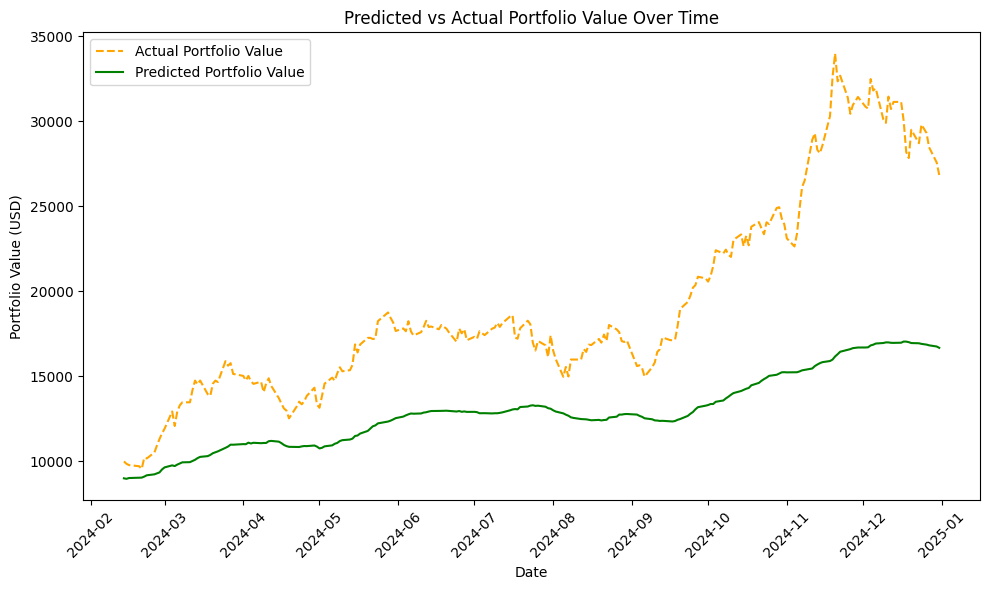

In [ ]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(total_portfolio_actual.index, total_portfolio_actual, label='Actual Portfolio Value', color='orange', linestyle='--')
plt.plot(total_portfolio_predicted.index, total_portfolio_predicted, label='Predicted Portfolio Value', color='green')
plt.title('Predicted vs Actual Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#  Combine the total portfolio values into a DataFrame for better visualization
portfolio_comparison_df = pd.DataFrame({
    'Total Predicted Portfolio Value': total_portfolio_predicted,
    'Total Actual Portfolio Value': total_portfolio_actual
})

# To make it look even better, you can use the 'tabulate' package to format the table neatly (optional)
try:
    from tabulate import tabulate
    print(tabulate(portfolio_comparison_df, headers='keys', tablefmt='pretty'))
except ImportError:
    print(portfolio_comparison_df)


+---------------------+---------------------------------+------------------------------+
|        Date         | Total Predicted Portfolio Value | Total Actual Portfolio Value |
+---------------------+---------------------------------+------------------------------+
| 2024-02-14 00:00:00 |        9005.607863094117        |           10000.0            |
| 2024-02-15 00:00:00 |        8976.232179675706        |      9860.424039765132       |
| 2024-02-16 00:00:00 |        9022.443229921835        |      9783.108910295508       |
| 2024-02-20 00:00:00 |        9042.123718195562        |      9716.157930811361       |
| 2024-02-21 00:00:00 |        9046.002869517719        |      9559.088951721986       |
| 2024-02-22 00:00:00 |        9105.791547462477        |      10213.142359429865      |
| 2024-02-23 00:00:00 |        9183.304492653166        |      10173.943468249885      |
| 2024-02-26 00:00:00 |        9238.877095757509        |      10521.12579894511       |
| 2024-02-27 00:00:00